In [1]:
import matplotlib.pyplot as plt
import numpy as np

`Point`
---

In [8]:
class Point():
    def __init__(self,x,y, v = 0):
        self.x = x
        self.y = y
        self.v = v

    def __str__(self):
        return "({},{})".format(self.x,self.y)
    
    def __repr__(self):
        return self.__str__()


def getHomography(s0, s1, s2, s3, t0, t1, t2, t3):

    x0s = s0.x
    y0s = s0.y
    x0t = t0.x
    y0t = t0.y

    x1s = s1.x
    y1s = s1.y
    x1t = t1.x
    y1t = t1.y

    x2s = s2.x
    y2s = s2.y
    x2t = t2.x
    y2t = t2.y

    x3s = s3.x
    y3s = s3.y
    x3t = t3.x
    y3t = t3.y

    #Solve for the homography matrix
    A = np.matrix([
            [x0s, y0s, 1, 0, 0, 0, -x0t*x0s, -x0t*y0s],
            [0, 0, 0, x0s, y0s, 1, -y0t*x0s, -y0t*y0s],
            [x1s, y1s, 1, 0, 0, 0, -x1t*x1s, -x1t*y1s],
            [0, 0, 0, x1s, y1s, 1, -y1t*x1s, -y1t*y1s],
            [x2s, y2s, 1, 0, 0, 0, -x2t*x2s, -x2t*y2s],
            [0, 0, 0, x2s, y2s, 1, -y2t*x2s, -y2t*y2s],
            [x3s, y3s, 1, 0, 0, 0, -x3t*x3s, -x3t*y3s],
            [0, 0, 0, x3s, y3s, 1, -y3t*x3s, -y3t*y3s]
        ])

    b = np.matrix([
            [x0t],
            [y0t],
            [x1t],
            [y1t],
            [x2t],
            [y2t],
            [x3t],
            [y3t]
        ])

    #The homorgraphy solutions a-h
    solutions = np.linalg.solve(A,b)

    solutions = np.append(solutions,[[1.0]], axis=0)

    #Reshape the homography into the appropriate 3x3 matrix
    homography = np.reshape(solutions, (3,3))
    
    return homography

`Interpolation`
---

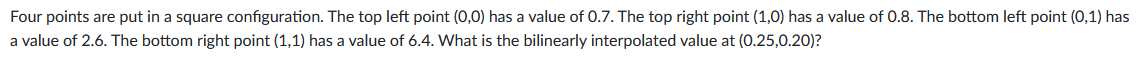

top left = .7  
top right = .8  
bottom left = 2.6  
bottom right = 6.4  
x = .25  
y = .2

`modified bilinear interpolate`

In [15]:
def interpolate(x: float, y: float, s00, s10, s01, s11) -> float | int:

    # distances/weights between TL pixel and orginal pixel
    xw = x - s00.x
    yw = y - s00.y

    return ( 
        s00.v * (1 - xw) * (1 - yw) + 
        s10.v * xw * (1 - yw) + 
        s01.v * (1 - xw) * yw + 
        s11.v * xw * yw
    )


p00, p10, p01, p11 = Point(0, 0, .7), Point(1, 0, 8.1), Point(0, 1, 3.5), Point(1, 1, 6.4)
x, y = .32, .48

print(interpolate(x, y, p00, p10, p01, p11))

3.7207999999999997


In [ ]:
def interpolate(image: np.ndarray, x: float, y: float) -> float | int:
    
    h, w, _ = image.shape

    # get neighboring points
    # clip to w/in bounds if necessary
    x0 = max(int(np.floor(x)), 0)
    y0 = max(int(np.floor(y)), 0)
    x1 = min(x0 + 1, w - 1) 
    y1 = min(y0 + 1, h - 1)

    # distances/weights between TL pixel and orginal pixel
    xw = x - x0
    yw = y - y0

    # neighboring pixel values
    p00 = image[y0, x0].astype(np.float32) # TL
    p01 = image[y0, x1].astype(np.float32) # TR
    p10 = image[y1, x0].astype(np.float32) # BL
    p11 = image[y1, x1].astype(np.float32) # BR

    return ( 
        p00 * (1 - xw) * (1 - yw) + 
        p01 * xw * (1 - yw) + 
        p10 * (1 - xw) * yw + 
        p11 * xw * yw
    )